In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [2]:
# Preprocessing

scenario= "helix" #sinus, helix
#n_instance = 1000
n_instance = 10000
n_features = 3
Z = 12 #3的倍數
nodes = 8 #8
scales = ['-1-1','0-1']
scaled = '-1-1'

X_train= x,y (10000, 2)
y_train= z (10000, 1)


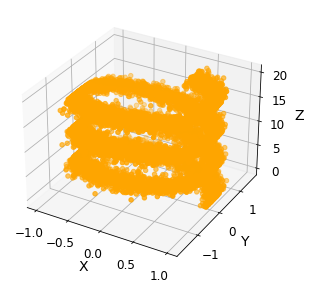

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [5]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, nodes, n_features)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          768         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256)          1024        dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 256)          0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [6]:
import AAE_Model

GANorWGAN='WGAN' #GAN
epochs = 5000 #500
batch_size = 100

In [7]:
aae = AAE_Model.AAE(Z, n_features, batch_size, GANorWGAN, nodes)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 256)          768         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 256)          1024        dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 256)          0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
data shape_11 (100, 3)
data shape_12 (100, 3)
data shape_13 (100, 3)
data shape_14 (100, 3)
data shape_15 (100, 3)
data shape_16 (100, 3)
data shape_17 (100, 3)
data shape_18 (100, 3)
data shape_19 (100, 3)
data shape_20 (100, 3)
data shape_21 (100, 3)
data shape_22 (100, 3)
data shape_23 (100, 3)
data shape_24 (100, 3)
data shape_25 (100, 3)
data shape_26 (100, 3)
data shape_27 (100, 3)
data shape_28 (100, 3)
data shape_29 (100, 3)
data shape_30 (100, 3)
data shape_31 (100, 3)
data shape_32 (100, 3)
data shape_33 (100, 3)
data shape_34 (100, 3)
data shape_35 (100, 3)
data shape_36 (100, 3)
data shape_37 (100, 3)
data shape_38 (100, 3)
data shape_39 (100, 3)
data shape_40 (100, 3)
data shape_41 (100, 3)
data shape_42 (100, 3)
data shape_43 (100, 3)
data shape_44 (100, 

### latent variable

## Training

In [9]:
hist = aae.train(Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


1 [D real: -0.592484, D fake: 0.636646], [Enc/Dec loss: 0.822935, Enc/Dis: 0.830158]
2 [D real: -0.610365, D fake: 0.641557], [Enc/Dec loss: 0.808219, Enc/Dis: 0.815406]
3 [D real: -0.620993, D fake: 0.639695], [Enc/Dec loss: 0.823785, Enc/Dis: 0.830976]
4 [D real: -0.629543, D fake: 0.641766], [Enc/Dec loss: 0.786160, Enc/Dis: 0.793306]
5 [D real: -0.632080, D fake: 0.641954], [Enc/Dec loss: 0.762013, Enc/Dis: 0.769188]
6 [D real: -0.632370, D fake: 0.640600], [Enc/Dec loss: 0.752358, Enc/Dis: 0.759537]
7 [D real: -0.633796, D fake: 0.644003], [Enc/Dec loss: 0.745541, Enc/Dis: 0.752693]
8 [D real: -0.635859, D fake: 0.644634], [Enc/Dec loss: 0.728467, Enc/Dis: 0.735581]
9 [D real: -0.634473, D fake: 0.646027], [Enc/Dec loss: 0.707279, Enc/Dis: 0.714388]
10 [D real: -0.634989, D fake: 0.645191], [Enc/Dec loss: 0.690893, Enc/Dis: 0.697994]
11 [D real: -0.635492, D fake: 0.646414], [Enc/Dec loss: 0.674879, Enc/Dis: 0.681969]
12 [D real: -0.637050, D fake: 0.647908], [Enc/Dec loss: 0.6561

94 [D real: -0.662745, D fake: 0.668157], [Enc/Dec loss: 0.277784, Enc/Dis: 0.284760]
95 [D real: -0.663125, D fake: 0.668448], [Enc/Dec loss: 0.276413, Enc/Dis: 0.283392]
96 [D real: -0.663557, D fake: 0.668663], [Enc/Dec loss: 0.274715, Enc/Dis: 0.281694]
97 [D real: -0.663749, D fake: 0.668770], [Enc/Dec loss: 0.273500, Enc/Dis: 0.280480]
98 [D real: -0.663914, D fake: 0.669041], [Enc/Dec loss: 0.271934, Enc/Dis: 0.278915]
99 [D real: -0.664158, D fake: 0.669203], [Enc/Dec loss: 0.270566, Enc/Dis: 0.277548]
100 [D real: -0.664252, D fake: 0.669379], [Enc/Dec loss: 0.269001, Enc/Dis: 0.275984]
101 [D real: -0.704857, D fake: 0.707328], [Enc/Dec loss: 0.131070, Enc/Dis: 0.138203]
102 [D real: -0.703759, D fake: 0.710178], [Enc/Dec loss: 0.139387, Enc/Dis: 0.146513]
103 [D real: -0.699266, D fake: 0.704029], [Enc/Dec loss: 0.127982, Enc/Dis: 0.135113]
104 [D real: -0.697804, D fake: 0.699344], [Enc/Dec loss: 0.130710, Enc/Dis: 0.137832]
105 [D real: -0.695227, D fake: 0.698715], [Enc/D

189 [D real: -0.703837, D fake: 0.704295], [Enc/Dec loss: 0.107580, Enc/Dis: 0.114624]
190 [D real: -0.703957, D fake: 0.704261], [Enc/Dec loss: 0.107436, Enc/Dis: 0.114480]
191 [D real: -0.703911, D fake: 0.704361], [Enc/Dec loss: 0.107283, Enc/Dis: 0.114324]
192 [D real: -0.703943, D fake: 0.704197], [Enc/Dec loss: 0.107211, Enc/Dis: 0.114250]
193 [D real: -0.703954, D fake: 0.704144], [Enc/Dec loss: 0.106948, Enc/Dis: 0.113985]
194 [D real: -0.704133, D fake: 0.704058], [Enc/Dec loss: 0.106662, Enc/Dis: 0.113694]
195 [D real: -0.704234, D fake: 0.703909], [Enc/Dec loss: 0.106444, Enc/Dis: 0.113474]
196 [D real: -0.704335, D fake: 0.703767], [Enc/Dec loss: 0.106279, Enc/Dis: 0.113306]
197 [D real: -0.704200, D fake: 0.703777], [Enc/Dec loss: 0.105996, Enc/Dis: 0.113022]
198 [D real: -0.704060, D fake: 0.703657], [Enc/Dec loss: 0.105993, Enc/Dis: 0.113015]
199 [D real: -0.703982, D fake: 0.703495], [Enc/Dec loss: 0.105807, Enc/Dis: 0.112828]
200 [D real: -0.703961, D fake: 0.703406], 

284 [D real: -0.665155, D fake: 0.602926], [Enc/Dec loss: 0.086069, Enc/Dis: 0.091621]
285 [D real: -0.665032, D fake: 0.601443], [Enc/Dec loss: 0.086051, Enc/Dis: 0.091587]
286 [D real: -0.664428, D fake: 0.599736], [Enc/Dec loss: 0.085888, Enc/Dis: 0.091404]
287 [D real: -0.663623, D fake: 0.597891], [Enc/Dec loss: 0.085759, Enc/Dis: 0.091258]
288 [D real: -0.663498, D fake: 0.596342], [Enc/Dec loss: 0.085875, Enc/Dis: 0.091352]
289 [D real: -0.662720, D fake: 0.594638], [Enc/Dec loss: 0.085877, Enc/Dis: 0.091341]
290 [D real: -0.661961, D fake: 0.592741], [Enc/Dec loss: 0.085891, Enc/Dis: 0.091336]
291 [D real: -0.661179, D fake: 0.590800], [Enc/Dec loss: 0.085846, Enc/Dis: 0.091272]
292 [D real: -0.661314, D fake: 0.589588], [Enc/Dec loss: 0.085846, Enc/Dis: 0.091259]
293 [D real: -0.660533, D fake: 0.587634], [Enc/Dec loss: 0.085715, Enc/Dis: 0.091110]
294 [D real: -0.660075, D fake: 0.585618], [Enc/Dec loss: 0.085662, Enc/Dis: 0.091038]
295 [D real: -0.659688, D fake: 0.583721], 

379 [D real: -0.669752, D fake: 0.341375], [Enc/Dec loss: 0.079151, Enc/Dis: 0.082043]
380 [D real: -0.671142, D fake: 0.341145], [Enc/Dec loss: 0.079186, Enc/Dis: 0.082069]
381 [D real: -0.672240, D fake: 0.339819], [Enc/Dec loss: 0.079181, Enc/Dis: 0.082055]
382 [D real: -0.672177, D fake: 0.338271], [Enc/Dec loss: 0.079171, Enc/Dis: 0.082038]
383 [D real: -0.672968, D fake: 0.337236], [Enc/Dec loss: 0.079327, Enc/Dis: 0.082183]
384 [D real: -0.673857, D fake: 0.336690], [Enc/Dec loss: 0.079197, Enc/Dis: 0.082047]
385 [D real: -0.674272, D fake: 0.336160], [Enc/Dec loss: 0.079450, Enc/Dis: 0.082290]
386 [D real: -0.674582, D fake: 0.334750], [Enc/Dec loss: 0.079519, Enc/Dis: 0.082351]
387 [D real: -0.675577, D fake: 0.332809], [Enc/Dec loss: 0.079506, Enc/Dis: 0.082334]
388 [D real: -0.676721, D fake: 0.332151], [Enc/Dec loss: 0.079568, Enc/Dis: 0.082396]
389 [D real: -0.677662, D fake: 0.330841], [Enc/Dec loss: 0.079594, Enc/Dis: 0.082415]
390 [D real: -0.678927, D fake: 0.329670], 

474 [D real: -0.846802, D fake: 0.159145], [Enc/Dec loss: 0.077287, Enc/Dis: 0.078853]
475 [D real: -0.847603, D fake: 0.158778], [Enc/Dec loss: 0.077180, Enc/Dis: 0.078742]
476 [D real: -0.848828, D fake: 0.157774], [Enc/Dec loss: 0.077271, Enc/Dis: 0.078827]
477 [D real: -0.849201, D fake: 0.157098], [Enc/Dec loss: 0.077186, Enc/Dis: 0.078734]
478 [D real: -0.849974, D fake: 0.156223], [Enc/Dec loss: 0.077157, Enc/Dis: 0.078697]
479 [D real: -0.850638, D fake: 0.155451], [Enc/Dec loss: 0.077107, Enc/Dis: 0.078638]
480 [D real: -0.851271, D fake: 0.154376], [Enc/Dec loss: 0.076987, Enc/Dis: 0.078508]
481 [D real: -0.852753, D fake: 0.153074], [Enc/Dec loss: 0.076927, Enc/Dis: 0.078443]
482 [D real: -0.853836, D fake: 0.152018], [Enc/Dec loss: 0.076748, Enc/Dis: 0.078256]
483 [D real: -0.854056, D fake: 0.151560], [Enc/Dec loss: 0.076729, Enc/Dis: 0.078228]
484 [D real: -0.854918, D fake: 0.151093], [Enc/Dec loss: 0.076611, Enc/Dis: 0.078104]
485 [D real: -0.855964, D fake: 0.150240], 

569 [D real: -0.942403, D fake: 0.057942], [Enc/Dec loss: 0.073154, Enc/Dis: 0.073824]
570 [D real: -0.942477, D fake: 0.058043], [Enc/Dec loss: 0.073255, Enc/Dis: 0.073922]
571 [D real: -0.942501, D fake: 0.057513], [Enc/Dec loss: 0.073244, Enc/Dis: 0.073907]
572 [D real: -0.942554, D fake: 0.057070], [Enc/Dec loss: 0.073112, Enc/Dis: 0.073771]
573 [D real: -0.942892, D fake: 0.056834], [Enc/Dec loss: 0.072927, Enc/Dis: 0.073582]
574 [D real: -0.943172, D fake: 0.056431], [Enc/Dec loss: 0.073022, Enc/Dis: 0.073679]
575 [D real: -0.943737, D fake: 0.056180], [Enc/Dec loss: 0.072998, Enc/Dis: 0.073650]
576 [D real: -0.943907, D fake: 0.055798], [Enc/Dec loss: 0.073005, Enc/Dis: 0.073651]
577 [D real: -0.943784, D fake: 0.055879], [Enc/Dec loss: 0.073066, Enc/Dis: 0.073707]
578 [D real: -0.943815, D fake: 0.055494], [Enc/Dec loss: 0.073020, Enc/Dis: 0.073656]
579 [D real: -0.943849, D fake: 0.055090], [Enc/Dec loss: 0.072972, Enc/Dis: 0.073606]
580 [D real: -0.944396, D fake: 0.054632], 

664 [D real: -0.971503, D fake: 0.029090], [Enc/Dec loss: 0.072840, Enc/Dis: 0.073192]
665 [D real: -0.971610, D fake: 0.028860], [Enc/Dec loss: 0.072592, Enc/Dis: 0.072941]
666 [D real: -0.970578, D fake: 0.028674], [Enc/Dec loss: 0.072677, Enc/Dis: 0.073023]
667 [D real: -0.970804, D fake: 0.028428], [Enc/Dec loss: 0.072572, Enc/Dis: 0.072918]
668 [D real: -0.971049, D fake: 0.028377], [Enc/Dec loss: 0.072433, Enc/Dis: 0.072778]
669 [D real: -0.971381, D fake: 0.028104], [Enc/Dec loss: 0.072376, Enc/Dis: 0.072721]
670 [D real: -0.971592, D fake: 0.028495], [Enc/Dec loss: 0.072307, Enc/Dis: 0.072650]
671 [D real: -0.971896, D fake: 0.028358], [Enc/Dec loss: 0.072287, Enc/Dis: 0.072628]
672 [D real: -0.972092, D fake: 0.028186], [Enc/Dec loss: 0.072187, Enc/Dis: 0.072525]
673 [D real: -0.972423, D fake: 0.028018], [Enc/Dec loss: 0.072227, Enc/Dis: 0.072564]
674 [D real: -0.972581, D fake: 0.027891], [Enc/Dec loss: 0.072131, Enc/Dis: 0.072468]
675 [D real: -0.972783, D fake: 0.027679], 

759 [D real: -0.986361, D fake: 0.013388], [Enc/Dec loss: 0.070090, Enc/Dis: 0.070295]
760 [D real: -0.986502, D fake: 0.013350], [Enc/Dec loss: 0.070057, Enc/Dis: 0.070263]
761 [D real: -0.986557, D fake: 0.013182], [Enc/Dec loss: 0.069919, Enc/Dis: 0.070123]
762 [D real: -0.986728, D fake: 0.013284], [Enc/Dec loss: 0.070001, Enc/Dis: 0.070204]
763 [D real: -0.986880, D fake: 0.013701], [Enc/Dec loss: 0.069892, Enc/Dis: 0.070094]
764 [D real: -0.986933, D fake: 0.013742], [Enc/Dec loss: 0.069772, Enc/Dis: 0.069973]
765 [D real: -0.987109, D fake: 0.013580], [Enc/Dec loss: 0.069754, Enc/Dis: 0.069955]
766 [D real: -0.987245, D fake: 0.013423], [Enc/Dec loss: 0.069862, Enc/Dis: 0.070062]
767 [D real: -0.987279, D fake: 0.013278], [Enc/Dec loss: 0.069856, Enc/Dis: 0.070054]
768 [D real: -0.987185, D fake: 0.013278], [Enc/Dec loss: 0.069951, Enc/Dis: 0.070150]
769 [D real: -0.987219, D fake: 0.013135], [Enc/Dec loss: 0.069936, Enc/Dis: 0.070134]
770 [D real: -0.987279, D fake: 0.013056], 

854 [D real: -0.992358, D fake: 0.007424], [Enc/Dec loss: 0.067116, Enc/Dis: 0.067259]
855 [D real: -0.992342, D fake: 0.007574], [Enc/Dec loss: 0.067431, Enc/Dis: 0.067574]
856 [D real: -0.992426, D fake: 0.007532], [Enc/Dec loss: 0.067321, Enc/Dis: 0.067463]
857 [D real: -0.992517, D fake: 0.007533], [Enc/Dec loss: 0.067268, Enc/Dis: 0.067410]
858 [D real: -0.992637, D fake: 0.007416], [Enc/Dec loss: 0.067094, Enc/Dis: 0.067235]
859 [D real: -0.992632, D fake: 0.007336], [Enc/Dec loss: 0.067259, Enc/Dis: 0.067399]
860 [D real: -0.992739, D fake: 0.007229], [Enc/Dec loss: 0.067169, Enc/Dis: 0.067308]
861 [D real: -0.992721, D fake: 0.007146], [Enc/Dec loss: 0.067230, Enc/Dis: 0.067370]
862 [D real: -0.992824, D fake: 0.007108], [Enc/Dec loss: 0.067373, Enc/Dis: 0.067513]
863 [D real: -0.992888, D fake: 0.007019], [Enc/Dec loss: 0.067255, Enc/Dis: 0.067395]
864 [D real: -0.992854, D fake: 0.007002], [Enc/Dec loss: 0.067140, Enc/Dis: 0.067279]
865 [D real: -0.992918, D fake: 0.006917], 

949 [D real: -0.993138, D fake: 0.007155], [Enc/Dec loss: 0.068957, Enc/Dis: 0.069083]
950 [D real: -0.993218, D fake: 0.007020], [Enc/Dec loss: 0.069007, Enc/Dis: 0.069132]
951 [D real: -0.993174, D fake: 0.006989], [Enc/Dec loss: 0.068963, Enc/Dis: 0.069087]
952 [D real: -0.993282, D fake: 0.006937], [Enc/Dec loss: 0.068873, Enc/Dis: 0.068996]
953 [D real: -0.993391, D fake: 0.006822], [Enc/Dec loss: 0.068872, Enc/Dis: 0.068995]
954 [D real: -0.993279, D fake: 0.006938], [Enc/Dec loss: 0.069262, Enc/Dis: 0.069385]
955 [D real: -0.993222, D fake: 0.006836], [Enc/Dec loss: 0.069153, Enc/Dis: 0.069275]
956 [D real: -0.993336, D fake: 0.006861], [Enc/Dec loss: 0.069302, Enc/Dis: 0.069423]
957 [D real: -0.993334, D fake: 0.006798], [Enc/Dec loss: 0.069426, Enc/Dis: 0.069546]
958 [D real: -0.993422, D fake: 0.006732], [Enc/Dec loss: 0.069685, Enc/Dis: 0.069805]
959 [D real: -0.992972, D fake: 0.006727], [Enc/Dec loss: 0.069700, Enc/Dis: 0.069820]
960 [D real: -0.993054, D fake: 0.006649], 

1043 [D real: -0.993819, D fake: 0.005148], [Enc/Dec loss: 0.067944, Enc/Dis: 0.068036]
1044 [D real: -0.993953, D fake: 0.005096], [Enc/Dec loss: 0.068184, Enc/Dis: 0.068277]
1045 [D real: -0.993981, D fake: 0.005189], [Enc/Dec loss: 0.068118, Enc/Dis: 0.068218]
1046 [D real: -0.994014, D fake: 0.006009], [Enc/Dec loss: 0.068094, Enc/Dis: 0.068194]
1047 [D real: -0.994124, D fake: 0.006007], [Enc/Dec loss: 0.067964, Enc/Dis: 0.068064]
1048 [D real: -0.994236, D fake: 0.007185], [Enc/Dec loss: 0.068045, Enc/Dis: 0.068145]
1049 [D real: -0.994308, D fake: 0.007450], [Enc/Dec loss: 0.068203, Enc/Dis: 0.068304]
1050 [D real: -0.994101, D fake: 0.007308], [Enc/Dec loss: 0.067888, Enc/Dis: 0.067987]
1051 [D real: -0.994099, D fake: 0.007170], [Enc/Dec loss: 0.067856, Enc/Dis: 0.067955]
1052 [D real: -0.993875, D fake: 0.007054], [Enc/Dec loss: 0.067787, Enc/Dis: 0.067887]
1053 [D real: -0.993887, D fake: 0.007051], [Enc/Dec loss: 0.067615, Enc/Dis: 0.067714]
1054 [D real: -0.993964, D fake:

1137 [D real: -0.995579, D fake: 0.005296], [Enc/Dec loss: 0.065093, Enc/Dis: 0.065217]
1138 [D real: -0.995685, D fake: 0.005173], [Enc/Dec loss: 0.065054, Enc/Dis: 0.065176]
1139 [D real: -0.995771, D fake: 0.005047], [Enc/Dec loss: 0.065074, Enc/Dis: 0.065195]
1140 [D real: -0.995850, D fake: 0.004978], [Enc/Dec loss: 0.065125, Enc/Dis: 0.065245]
1141 [D real: -0.995948, D fake: 0.004879], [Enc/Dec loss: 0.065208, Enc/Dis: 0.065328]
1142 [D real: -0.996014, D fake: 0.004791], [Enc/Dec loss: 0.065259, Enc/Dis: 0.065377]
1143 [D real: -0.996083, D fake: 0.004942], [Enc/Dec loss: 0.065385, Enc/Dis: 0.065502]
1144 [D real: -0.996158, D fake: 0.004859], [Enc/Dec loss: 0.065913, Enc/Dis: 0.066030]
1145 [D real: -0.996186, D fake: 0.004766], [Enc/Dec loss: 0.065768, Enc/Dis: 0.065884]
1146 [D real: -0.996174, D fake: 0.004671], [Enc/Dec loss: 0.065553, Enc/Dis: 0.065668]
1147 [D real: -0.996057, D fake: 0.004584], [Enc/Dec loss: 0.065436, Enc/Dis: 0.065550]
1148 [D real: -0.996092, D fake:

1231 [D real: -0.996314, D fake: 0.004484], [Enc/Dec loss: 0.064782, Enc/Dis: 0.064892]
1232 [D real: -0.996338, D fake: 0.005027], [Enc/Dec loss: 0.065483, Enc/Dis: 0.065594]
1233 [D real: -0.996424, D fake: 0.004894], [Enc/Dec loss: 0.065467, Enc/Dis: 0.065577]
1234 [D real: -0.996512, D fake: 0.004754], [Enc/Dec loss: 0.065531, Enc/Dis: 0.065641]
1235 [D real: -0.996590, D fake: 0.004629], [Enc/Dec loss: 0.065421, Enc/Dis: 0.065529]
1236 [D real: -0.996573, D fake: 0.004583], [Enc/Dec loss: 0.065057, Enc/Dis: 0.065166]
1237 [D real: -0.996658, D fake: 0.004474], [Enc/Dec loss: 0.064738, Enc/Dis: 0.064851]
1238 [D real: -0.996742, D fake: 0.004417], [Enc/Dec loss: 0.064993, Enc/Dis: 0.065106]
1239 [D real: -0.996499, D fake: 0.004328], [Enc/Dec loss: 0.064849, Enc/Dis: 0.064960]
1240 [D real: -0.996578, D fake: 0.004232], [Enc/Dec loss: 0.064879, Enc/Dis: 0.064989]
1241 [D real: -0.996412, D fake: 0.004182], [Enc/Dec loss: 0.065285, Enc/Dis: 0.065395]
1242 [D real: -0.996338, D fake:

1325 [D real: -0.993669, D fake: 0.004985], [Enc/Dec loss: 0.062885, Enc/Dis: 0.062970]
1326 [D real: -0.993891, D fake: 0.004815], [Enc/Dec loss: 0.062661, Enc/Dis: 0.062745]
1327 [D real: -0.994053, D fake: 0.004816], [Enc/Dec loss: 0.063056, Enc/Dis: 0.063141]
1328 [D real: -0.994255, D fake: 0.004761], [Enc/Dec loss: 0.062906, Enc/Dis: 0.062991]
1329 [D real: -0.994451, D fake: 0.004702], [Enc/Dec loss: 0.063101, Enc/Dis: 0.063186]
1330 [D real: -0.994200, D fake: 0.004758], [Enc/Dec loss: 0.063226, Enc/Dis: 0.063310]
1331 [D real: -0.994375, D fake: 0.004609], [Enc/Dec loss: 0.063517, Enc/Dis: 0.063601]
1332 [D real: -0.994428, D fake: 0.004489], [Enc/Dec loss: 0.063491, Enc/Dis: 0.063575]
1333 [D real: -0.994568, D fake: 0.004508], [Enc/Dec loss: 0.063502, Enc/Dis: 0.063586]
1334 [D real: -0.994720, D fake: 0.004478], [Enc/Dec loss: 0.063492, Enc/Dis: 0.063577]
1335 [D real: -0.994854, D fake: 0.004437], [Enc/Dec loss: 0.063888, Enc/Dis: 0.063974]
1336 [D real: -0.994923, D fake:

1419 [D real: -0.998027, D fake: 0.001639], [Enc/Dec loss: 0.061761, Enc/Dis: 0.061843]
1420 [D real: -0.998123, D fake: 0.001626], [Enc/Dec loss: 0.062568, Enc/Dis: 0.062651]
1421 [D real: -0.997952, D fake: 0.001632], [Enc/Dec loss: 0.062527, Enc/Dis: 0.062609]
1422 [D real: -0.998044, D fake: 0.001664], [Enc/Dec loss: 0.061915, Enc/Dis: 0.061996]
1423 [D real: -0.998120, D fake: 0.001664], [Enc/Dec loss: 0.061567, Enc/Dis: 0.061647]
1424 [D real: -0.998196, D fake: 0.001684], [Enc/Dec loss: 0.062342, Enc/Dis: 0.062422]
1425 [D real: -0.998262, D fake: 0.001699], [Enc/Dec loss: 0.062748, Enc/Dis: 0.062830]
1426 [D real: -0.998327, D fake: 0.001685], [Enc/Dec loss: 0.063593, Enc/Dis: 0.063678]
1427 [D real: -0.998353, D fake: 0.001638], [Enc/Dec loss: 0.063700, Enc/Dis: 0.063785]
1428 [D real: -0.998397, D fake: 0.001595], [Enc/Dec loss: 0.063606, Enc/Dis: 0.063690]
1429 [D real: -0.998444, D fake: 0.001551], [Enc/Dec loss: 0.064400, Enc/Dis: 0.064484]
1430 [D real: -0.998487, D fake:

1513 [D real: -0.994752, D fake: 0.005666], [Enc/Dec loss: 0.062192, Enc/Dis: 0.062380]
1514 [D real: -0.995099, D fake: 0.005838], [Enc/Dec loss: 0.062204, Enc/Dis: 0.062386]
1515 [D real: -0.995380, D fake: 0.005454], [Enc/Dec loss: 0.061973, Enc/Dis: 0.062147]
1516 [D real: -0.995649, D fake: 0.005157], [Enc/Dec loss: 0.061816, Enc/Dis: 0.061984]
1517 [D real: -0.995851, D fake: 0.004920], [Enc/Dec loss: 0.061919, Enc/Dis: 0.062080]
1518 [D real: -0.994940, D fake: 0.004774], [Enc/Dec loss: 0.062677, Enc/Dis: 0.062834]
1519 [D real: -0.995100, D fake: 0.004524], [Enc/Dec loss: 0.061886, Enc/Dis: 0.062038]
1520 [D real: -0.995336, D fake: 0.004330], [Enc/Dec loss: 0.061747, Enc/Dis: 0.061894]
1521 [D real: -0.995549, D fake: 0.004194], [Enc/Dec loss: 0.061434, Enc/Dis: 0.061580]
1522 [D real: -0.995716, D fake: 0.004006], [Enc/Dec loss: 0.061145, Enc/Dis: 0.061287]
1523 [D real: -0.995830, D fake: 0.003847], [Enc/Dec loss: 0.061702, Enc/Dis: 0.061842]
1524 [D real: -0.995992, D fake:

1607 [D real: -0.999397, D fake: 0.003795], [Enc/Dec loss: 0.063867, Enc/Dis: 0.063968]
1608 [D real: -0.999443, D fake: 0.003327], [Enc/Dec loss: 0.063701, Enc/Dis: 0.063797]
1609 [D real: -0.999323, D fake: 0.003304], [Enc/Dec loss: 0.062526, Enc/Dis: 0.062618]
1610 [D real: -0.999310, D fake: 0.003060], [Enc/Dec loss: 0.061566, Enc/Dis: 0.061655]
1611 [D real: -0.999353, D fake: 0.002783], [Enc/Dec loss: 0.061886, Enc/Dis: 0.061973]
1612 [D real: -0.999383, D fake: 0.002588], [Enc/Dec loss: 0.062539, Enc/Dis: 0.062626]
1613 [D real: -0.999408, D fake: 0.002395], [Enc/Dec loss: 0.062154, Enc/Dis: 0.062239]
1614 [D real: -0.999325, D fake: 0.002276], [Enc/Dec loss: 0.062330, Enc/Dis: 0.062413]
1615 [D real: -0.999353, D fake: 0.002125], [Enc/Dec loss: 0.062756, Enc/Dis: 0.062838]
1616 [D real: -0.999339, D fake: 0.001994], [Enc/Dec loss: 0.062350, Enc/Dis: 0.062431]
1617 [D real: -0.999373, D fake: 0.001879], [Enc/Dec loss: 0.061958, Enc/Dis: 0.062038]
1618 [D real: -0.999317, D fake:

1701 [D real: -0.993433, D fake: 0.000074], [Enc/Dec loss: 0.071479, Enc/Dis: 0.071557]
1702 [D real: -0.996652, D fake: 0.000084], [Enc/Dec loss: 0.065583, Enc/Dis: 0.065653]
1703 [D real: -0.997073, D fake: 0.000316], [Enc/Dec loss: 0.072193, Enc/Dis: 0.072269]
1704 [D real: -0.997787, D fake: 0.001014], [Enc/Dec loss: 0.071237, Enc/Dis: 0.071311]
1705 [D real: -0.998209, D fake: 0.000914], [Enc/Dec loss: 0.066377, Enc/Dis: 0.066446]
1706 [D real: -0.998349, D fake: 0.000859], [Enc/Dec loss: 0.064769, Enc/Dis: 0.064838]
1707 [D real: -0.998043, D fake: 0.001314], [Enc/Dec loss: 0.064065, Enc/Dis: 0.064145]
1708 [D real: -0.998218, D fake: 0.001177], [Enc/Dec loss: 0.064056, Enc/Dis: 0.064136]
1709 [D real: -0.998405, D fake: 0.001086], [Enc/Dec loss: 0.063741, Enc/Dis: 0.063819]
1710 [D real: -0.998557, D fake: 0.000992], [Enc/Dec loss: 0.063218, Enc/Dis: 0.063295]
1711 [D real: -0.998671, D fake: 0.000960], [Enc/Dec loss: 0.062116, Enc/Dis: 0.062190]
1712 [D real: -0.998779, D fake:

1795 [D real: -0.996722, D fake: 0.003720], [Enc/Dec loss: 0.062365, Enc/Dis: 0.062448]
1796 [D real: -0.996643, D fake: 0.003684], [Enc/Dec loss: 0.062398, Enc/Dis: 0.062481]
1797 [D real: -0.996609, D fake: 0.003678], [Enc/Dec loss: 0.062353, Enc/Dis: 0.062436]
1798 [D real: -0.996641, D fake: 0.003709], [Enc/Dec loss: 0.062519, Enc/Dis: 0.062603]
1799 [D real: -0.996598, D fake: 0.003678], [Enc/Dec loss: 0.062420, Enc/Dis: 0.062504]
1800 [D real: -0.996618, D fake: 0.003644], [Enc/Dec loss: 0.062423, Enc/Dis: 0.062507]
1801 [D real: -0.998487, D fake: 0.000293], [Enc/Dec loss: 0.072247, Enc/Dis: 0.072327]
1802 [D real: -0.999213, D fake: 0.000417], [Enc/Dec loss: 0.069660, Enc/Dis: 0.069735]
1803 [D real: -0.998361, D fake: 0.002796], [Enc/Dec loss: 0.073521, Enc/Dis: 0.073598]
1804 [D real: -0.998757, D fake: 0.002215], [Enc/Dec loss: 0.071841, Enc/Dis: 0.071917]
1805 [D real: -0.998927, D fake: 0.001809], [Enc/Dec loss: 0.072192, Enc/Dis: 0.072268]
1806 [D real: -0.999068, D fake:

1889 [D real: -0.996543, D fake: 0.003408], [Enc/Dec loss: 0.062516, Enc/Dis: 0.062596]
1890 [D real: -0.996373, D fake: 0.003370], [Enc/Dec loss: 0.062777, Enc/Dis: 0.062859]
1891 [D real: -0.996355, D fake: 0.003337], [Enc/Dec loss: 0.062744, Enc/Dis: 0.062826]
1892 [D real: -0.996364, D fake: 0.003301], [Enc/Dec loss: 0.062823, Enc/Dis: 0.062905]
1893 [D real: -0.996402, D fake: 0.003266], [Enc/Dec loss: 0.062897, Enc/Dis: 0.062979]
1894 [D real: -0.996440, D fake: 0.003234], [Enc/Dec loss: 0.062876, Enc/Dis: 0.062957]
1895 [D real: -0.996477, D fake: 0.003204], [Enc/Dec loss: 0.062898, Enc/Dis: 0.062979]
1896 [D real: -0.996502, D fake: 0.004040], [Enc/Dec loss: 0.062954, Enc/Dis: 0.063036]
1897 [D real: -0.996537, D fake: 0.003999], [Enc/Dec loss: 0.063018, Enc/Dis: 0.063100]
1898 [D real: -0.996455, D fake: 0.003958], [Enc/Dec loss: 0.062884, Enc/Dis: 0.062966]
1899 [D real: -0.996381, D fake: 0.003990], [Enc/Dec loss: 0.063083, Enc/Dis: 0.063164]
1900 [D real: -0.996415, D fake:

1983 [D real: -0.997870, D fake: 0.001699], [Enc/Dec loss: 0.060316, Enc/Dis: 0.060390]
1984 [D real: -0.997415, D fake: 0.001679], [Enc/Dec loss: 0.060364, Enc/Dis: 0.060438]
1985 [D real: -0.997419, D fake: 0.001661], [Enc/Dec loss: 0.060347, Enc/Dis: 0.060420]
1986 [D real: -0.997448, D fake: 0.001643], [Enc/Dec loss: 0.060302, Enc/Dis: 0.060376]
1987 [D real: -0.997469, D fake: 0.001625], [Enc/Dec loss: 0.060130, Enc/Dis: 0.060204]
1988 [D real: -0.997496, D fake: 0.001607], [Enc/Dec loss: 0.060224, Enc/Dis: 0.060297]
1989 [D real: -0.997524, D fake: 0.001593], [Enc/Dec loss: 0.060256, Enc/Dis: 0.060329]
1990 [D real: -0.997551, D fake: 0.001576], [Enc/Dec loss: 0.060393, Enc/Dis: 0.060466]
1991 [D real: -0.997549, D fake: 0.001585], [Enc/Dec loss: 0.060568, Enc/Dis: 0.060642]
1992 [D real: -0.997576, D fake: 0.001750], [Enc/Dec loss: 0.060673, Enc/Dis: 0.060746]
1993 [D real: -0.997597, D fake: 0.001743], [Enc/Dec loss: 0.060795, Enc/Dis: 0.060869]
1994 [D real: -0.997571, D fake:

2077 [D real: -0.998447, D fake: 0.001766], [Enc/Dec loss: 0.061612, Enc/Dis: 0.061686]
2078 [D real: -0.998465, D fake: 0.001748], [Enc/Dec loss: 0.061556, Enc/Dis: 0.061630]
2079 [D real: -0.998470, D fake: 0.001726], [Enc/Dec loss: 0.061448, Enc/Dis: 0.061522]
2080 [D real: -0.998485, D fake: 0.001705], [Enc/Dec loss: 0.061509, Enc/Dis: 0.061583]
2081 [D real: -0.998488, D fake: 0.001686], [Enc/Dec loss: 0.061558, Enc/Dis: 0.061631]
2082 [D real: -0.998499, D fake: 0.001679], [Enc/Dec loss: 0.061422, Enc/Dis: 0.061495]
2083 [D real: -0.998516, D fake: 0.001659], [Enc/Dec loss: 0.061447, Enc/Dis: 0.061520]
2084 [D real: -0.998534, D fake: 0.001650], [Enc/Dec loss: 0.061348, Enc/Dis: 0.061421]
2085 [D real: -0.998532, D fake: 0.001650], [Enc/Dec loss: 0.061287, Enc/Dis: 0.061360]
2086 [D real: -0.998541, D fake: 0.001633], [Enc/Dec loss: 0.061323, Enc/Dis: 0.061396]
2087 [D real: -0.998439, D fake: 0.001614], [Enc/Dec loss: 0.061390, Enc/Dis: 0.061463]
2088 [D real: -0.998423, D fake:

2171 [D real: -0.998998, D fake: 0.001391], [Enc/Dec loss: 0.062228, Enc/Dis: 0.062304]
2172 [D real: -0.999007, D fake: 0.001575], [Enc/Dec loss: 0.062078, Enc/Dis: 0.062153]
2173 [D real: -0.999020, D fake: 0.001556], [Enc/Dec loss: 0.061936, Enc/Dis: 0.062011]
2174 [D real: -0.999033, D fake: 0.001537], [Enc/Dec loss: 0.061960, Enc/Dis: 0.062035]
2175 [D real: -0.999046, D fake: 0.001517], [Enc/Dec loss: 0.061837, Enc/Dis: 0.061912]
2176 [D real: -0.998739, D fake: 0.001499], [Enc/Dec loss: 0.061714, Enc/Dis: 0.061789]
2177 [D real: -0.998640, D fake: 0.001492], [Enc/Dec loss: 0.061828, Enc/Dis: 0.061903]
2178 [D real: -0.998653, D fake: 0.001479], [Enc/Dec loss: 0.061832, Enc/Dis: 0.061906]
2179 [D real: -0.998670, D fake: 0.001464], [Enc/Dec loss: 0.061952, Enc/Dis: 0.062027]
2180 [D real: -0.998687, D fake: 0.001472], [Enc/Dec loss: 0.061894, Enc/Dis: 0.061968]
2181 [D real: -0.998694, D fake: 0.001556], [Enc/Dec loss: 0.062012, Enc/Dis: 0.062087]
2182 [D real: -0.998693, D fake:

2265 [D real: -0.996028, D fake: 0.004188], [Enc/Dec loss: 0.060479, Enc/Dis: 0.060574]
2266 [D real: -0.996085, D fake: 0.004757], [Enc/Dec loss: 0.060393, Enc/Dis: 0.060488]
2267 [D real: -0.996144, D fake: 0.004689], [Enc/Dec loss: 0.060293, Enc/Dis: 0.060388]
2268 [D real: -0.996200, D fake: 0.004629], [Enc/Dec loss: 0.060437, Enc/Dis: 0.060532]
2269 [D real: -0.995941, D fake: 0.004565], [Enc/Dec loss: 0.060463, Enc/Dis: 0.060560]
2270 [D real: -0.995998, D fake: 0.005153], [Enc/Dec loss: 0.060524, Enc/Dis: 0.060620]
2271 [D real: -0.996049, D fake: 0.005080], [Enc/Dec loss: 0.060511, Enc/Dis: 0.060607]
2272 [D real: -0.995763, D fake: 0.005010], [Enc/Dec loss: 0.060705, Enc/Dis: 0.060800]
2273 [D real: -0.995814, D fake: 0.004942], [Enc/Dec loss: 0.060645, Enc/Dis: 0.060740]
2274 [D real: -0.995843, D fake: 0.004875], [Enc/Dec loss: 0.060563, Enc/Dis: 0.060657]
2275 [D real: -0.995762, D fake: 0.004811], [Enc/Dec loss: 0.060603, Enc/Dis: 0.060700]
2276 [D real: -0.995653, D fake:

2359 [D real: -0.994961, D fake: 0.002839], [Enc/Dec loss: 0.060197, Enc/Dis: 0.060282]
2360 [D real: -0.995044, D fake: 0.006787], [Enc/Dec loss: 0.060036, Enc/Dis: 0.060120]
2361 [D real: -0.995120, D fake: 0.006679], [Enc/Dec loss: 0.060077, Enc/Dis: 0.060161]
2362 [D real: -0.995173, D fake: 0.006573], [Enc/Dec loss: 0.059888, Enc/Dis: 0.059972]
2363 [D real: -0.994434, D fake: 0.006482], [Enc/Dec loss: 0.059982, Enc/Dis: 0.060065]
2364 [D real: -0.993061, D fake: 0.006381], [Enc/Dec loss: 0.060325, Enc/Dis: 0.060409]
2365 [D real: -0.986306, D fake: 0.006288], [Enc/Dec loss: 0.060409, Enc/Dis: 0.060492]
2366 [D real: -0.986283, D fake: 0.006261], [Enc/Dec loss: 0.060415, Enc/Dis: 0.060501]
2367 [D real: -0.986401, D fake: 0.007390], [Enc/Dec loss: 0.060352, Enc/Dis: 0.060439]
2368 [D real: -0.986600, D fake: 0.007519], [Enc/Dec loss: 0.060232, Enc/Dis: 0.060321]
2369 [D real: -0.986794, D fake: 0.007751], [Enc/Dec loss: 0.060194, Enc/Dis: 0.060283]
2370 [D real: -0.986983, D fake:

2453 [D real: -0.996819, D fake: 0.002683], [Enc/Dec loss: 0.060218, Enc/Dis: 0.060301]
2454 [D real: -0.996877, D fake: 0.002659], [Enc/Dec loss: 0.060126, Enc/Dis: 0.060209]
2455 [D real: -0.996933, D fake: 0.002611], [Enc/Dec loss: 0.059942, Enc/Dis: 0.060025]
2456 [D real: -0.996982, D fake: 0.002564], [Enc/Dec loss: 0.060107, Enc/Dis: 0.060190]
2457 [D real: -0.997029, D fake: 0.002522], [Enc/Dec loss: 0.060159, Enc/Dis: 0.060241]
2458 [D real: -0.997076, D fake: 0.002481], [Enc/Dec loss: 0.060078, Enc/Dis: 0.060160]
2459 [D real: -0.997123, D fake: 0.002439], [Enc/Dec loss: 0.059972, Enc/Dis: 0.060053]
2460 [D real: -0.997059, D fake: 0.002399], [Enc/Dec loss: 0.059983, Enc/Dis: 0.060064]
2461 [D real: -0.997107, D fake: 0.002365], [Enc/Dec loss: 0.059957, Enc/Dis: 0.060038]
2462 [D real: -0.997150, D fake: 0.002413], [Enc/Dec loss: 0.059898, Enc/Dis: 0.059979]
2463 [D real: -0.997195, D fake: 0.002375], [Enc/Dec loss: 0.059938, Enc/Dis: 0.060019]
2464 [D real: -0.997228, D fake:

2547 [D real: -0.997663, D fake: 0.002783], [Enc/Dec loss: 0.062215, Enc/Dis: 0.062285]
2548 [D real: -0.997698, D fake: 0.002742], [Enc/Dec loss: 0.062378, Enc/Dis: 0.062448]
2549 [D real: -0.997693, D fake: 0.002756], [Enc/Dec loss: 0.062300, Enc/Dis: 0.062371]
2550 [D real: -0.997468, D fake: 0.002751], [Enc/Dec loss: 0.062170, Enc/Dis: 0.062242]
2551 [D real: -0.997517, D fake: 0.002711], [Enc/Dec loss: 0.061812, Enc/Dis: 0.061884]
2552 [D real: -0.997562, D fake: 0.002659], [Enc/Dec loss: 0.061826, Enc/Dis: 0.061897]
2553 [D real: -0.997606, D fake: 0.002616], [Enc/Dec loss: 0.061576, Enc/Dis: 0.061647]
2554 [D real: -0.997636, D fake: 0.002568], [Enc/Dec loss: 0.061320, Enc/Dis: 0.061391]
2555 [D real: -0.997673, D fake: 0.002576], [Enc/Dec loss: 0.061275, Enc/Dis: 0.061346]
2556 [D real: -0.997714, D fake: 0.002531], [Enc/Dec loss: 0.061023, Enc/Dis: 0.061094]
2557 [D real: -0.997752, D fake: 0.002514], [Enc/Dec loss: 0.061303, Enc/Dis: 0.061374]
2558 [D real: -0.997769, D fake:

2641 [D real: -0.997217, D fake: 0.003054], [Enc/Dec loss: 0.061125, Enc/Dis: 0.061203]
2642 [D real: -0.997237, D fake: 0.002982], [Enc/Dec loss: 0.061132, Enc/Dis: 0.061210]
2643 [D real: -0.997268, D fake: 0.002912], [Enc/Dec loss: 0.060919, Enc/Dis: 0.060997]
2644 [D real: -0.996971, D fake: 0.002847], [Enc/Dec loss: 0.060912, Enc/Dis: 0.060989]
2645 [D real: -0.997030, D fake: 0.002930], [Enc/Dec loss: 0.060692, Enc/Dis: 0.060768]
2646 [D real: -0.997094, D fake: 0.002868], [Enc/Dec loss: 0.060985, Enc/Dis: 0.061061]
2647 [D real: -0.996948, D fake: 0.002808], [Enc/Dec loss: 0.060660, Enc/Dis: 0.060735]
2648 [D real: -0.997010, D fake: 0.002760], [Enc/Dec loss: 0.060691, Enc/Dis: 0.060767]
2649 [D real: -0.997065, D fake: 0.002705], [Enc/Dec loss: 0.060695, Enc/Dis: 0.060772]
2650 [D real: -0.997111, D fake: 0.002875], [Enc/Dec loss: 0.060718, Enc/Dis: 0.060794]
2651 [D real: -0.997155, D fake: 0.002839], [Enc/Dec loss: 0.060735, Enc/Dis: 0.060813]
2652 [D real: -0.997208, D fake:

2735 [D real: -0.998211, D fake: 0.002218], [Enc/Dec loss: 0.061569, Enc/Dis: 0.061633]
2736 [D real: -0.998255, D fake: 0.002156], [Enc/Dec loss: 0.061531, Enc/Dis: 0.061594]
2737 [D real: -0.998292, D fake: 0.002320], [Enc/Dec loss: 0.061373, Enc/Dis: 0.061436]
2738 [D real: -0.998337, D fake: 0.002278], [Enc/Dec loss: 0.060949, Enc/Dis: 0.061012]
2739 [D real: -0.998379, D fake: 0.002224], [Enc/Dec loss: 0.061009, Enc/Dis: 0.061073]
2740 [D real: -0.998420, D fake: 0.002177], [Enc/Dec loss: 0.061079, Enc/Dis: 0.061143]
2741 [D real: -0.998456, D fake: 0.002125], [Enc/Dec loss: 0.060544, Enc/Dis: 0.060607]
2742 [D real: -0.998479, D fake: 0.002075], [Enc/Dec loss: 0.061053, Enc/Dis: 0.061117]
2743 [D real: -0.998507, D fake: 0.002027], [Enc/Dec loss: 0.061003, Enc/Dis: 0.061067]
2744 [D real: -0.998538, D fake: 0.001986], [Enc/Dec loss: 0.061031, Enc/Dis: 0.061095]
2745 [D real: -0.998569, D fake: 0.002042], [Enc/Dec loss: 0.060835, Enc/Dis: 0.060899]
2746 [D real: -0.998599, D fake:

2829 [D real: -0.999894, D fake: 0.000241], [Enc/Dec loss: 0.058346, Enc/Dis: 0.058414]
2830 [D real: -0.999891, D fake: 0.000233], [Enc/Dec loss: 0.059172, Enc/Dis: 0.059240]
2831 [D real: -0.999894, D fake: 0.000227], [Enc/Dec loss: 0.059028, Enc/Dis: 0.059096]
2832 [D real: -0.999896, D fake: 0.000230], [Enc/Dec loss: 0.059353, Enc/Dis: 0.059421]
2833 [D real: -0.999895, D fake: 0.000223], [Enc/Dec loss: 0.059476, Enc/Dis: 0.059543]
2834 [D real: -0.999896, D fake: 0.000217], [Enc/Dec loss: 0.059172, Enc/Dis: 0.059239]
2835 [D real: -0.999896, D fake: 0.000241], [Enc/Dec loss: 0.059437, Enc/Dis: 0.059504]
2836 [D real: -0.999895, D fake: 0.000235], [Enc/Dec loss: 0.059354, Enc/Dis: 0.059421]
2837 [D real: -0.999896, D fake: 0.000229], [Enc/Dec loss: 0.059426, Enc/Dis: 0.059492]
2838 [D real: -0.999898, D fake: 0.000247], [Enc/Dec loss: 0.059856, Enc/Dis: 0.059924]
2839 [D real: -0.999885, D fake: 0.000242], [Enc/Dec loss: 0.059834, Enc/Dis: 0.059902]
2840 [D real: -0.999888, D fake:

2923 [D real: -0.998529, D fake: 0.000428], [Enc/Dec loss: 0.059054, Enc/Dis: 0.059119]
2924 [D real: -0.998590, D fake: 0.000585], [Enc/Dec loss: 0.058976, Enc/Dis: 0.059042]
2925 [D real: -0.998647, D fake: 0.001650], [Enc/Dec loss: 0.059628, Enc/Dis: 0.059702]
2926 [D real: -0.998699, D fake: 0.001615], [Enc/Dec loss: 0.059693, Enc/Dis: 0.059767]
2927 [D real: -0.998747, D fake: 0.001555], [Enc/Dec loss: 0.059654, Enc/Dis: 0.059727]
2928 [D real: -0.998791, D fake: 0.001583], [Enc/Dec loss: 0.059675, Enc/Dis: 0.059749]
2929 [D real: -0.998833, D fake: 0.001588], [Enc/Dec loss: 0.059468, Enc/Dis: 0.059541]
2930 [D real: -0.998871, D fake: 0.001538], [Enc/Dec loss: 0.059149, Enc/Dis: 0.059221]
2931 [D real: -0.998327, D fake: 0.001517], [Enc/Dec loss: 0.059899, Enc/Dis: 0.059971]
2932 [D real: -0.998243, D fake: 0.001471], [Enc/Dec loss: 0.060273, Enc/Dis: 0.060346]
2933 [D real: -0.998295, D fake: 0.001476], [Enc/Dec loss: 0.060440, Enc/Dis: 0.060513]
2934 [D real: -0.998339, D fake:

3017 [D real: -0.998142, D fake: 0.001223], [Enc/Dec loss: 0.058425, Enc/Dis: 0.058487]
3018 [D real: -0.998242, D fake: 0.001308], [Enc/Dec loss: 0.058116, Enc/Dis: 0.058183]
3019 [D real: -0.998334, D fake: 0.001261], [Enc/Dec loss: 0.058329, Enc/Dis: 0.058396]
3020 [D real: -0.998417, D fake: 0.001203], [Enc/Dec loss: 0.058617, Enc/Dis: 0.058684]
3021 [D real: -0.998493, D fake: 0.001146], [Enc/Dec loss: 0.058429, Enc/Dis: 0.058503]
3022 [D real: -0.998533, D fake: 0.001098], [Enc/Dec loss: 0.058663, Enc/Dis: 0.058737]
3023 [D real: -0.998588, D fake: 0.001055], [Enc/Dec loss: 0.058142, Enc/Dis: 0.058215]
3024 [D real: -0.998468, D fake: 0.001016], [Enc/Dec loss: 0.058026, Enc/Dis: 0.058099]
3025 [D real: -0.998528, D fake: 0.001032], [Enc/Dec loss: 0.057971, Enc/Dis: 0.058044]
3026 [D real: -0.997357, D fake: 0.001019], [Enc/Dec loss: 0.057849, Enc/Dis: 0.057920]
3027 [D real: -0.997455, D fake: 0.000982], [Enc/Dec loss: 0.057371, Enc/Dis: 0.057441]
3028 [D real: -0.997546, D fake:

3111 [D real: -0.999906, D fake: 0.000372], [Enc/Dec loss: 0.065915, Enc/Dis: 0.065982]
3112 [D real: -0.999909, D fake: 0.000341], [Enc/Dec loss: 0.065762, Enc/Dis: 0.065829]
3113 [D real: -0.999915, D fake: 0.000315], [Enc/Dec loss: 0.063938, Enc/Dis: 0.064003]
3114 [D real: -0.999917, D fake: 0.000293], [Enc/Dec loss: 0.062996, Enc/Dis: 0.063060]
3115 [D real: -0.999914, D fake: 0.000275], [Enc/Dec loss: 0.062830, Enc/Dis: 0.062894]
3116 [D real: -0.999917, D fake: 0.000258], [Enc/Dec loss: 0.062384, Enc/Dis: 0.062447]
3117 [D real: -0.999922, D fake: 0.000243], [Enc/Dec loss: 0.062273, Enc/Dis: 0.062336]
3118 [D real: -0.999925, D fake: 0.000242], [Enc/Dec loss: 0.062500, Enc/Dis: 0.062564]
3119 [D real: -0.999927, D fake: 0.000231], [Enc/Dec loss: 0.061688, Enc/Dis: 0.061751]
3120 [D real: -0.999931, D fake: 0.000219], [Enc/Dec loss: 0.061921, Enc/Dis: 0.061984]
3121 [D real: -0.999915, D fake: 0.000209], [Enc/Dec loss: 0.061281, Enc/Dis: 0.061343]
3122 [D real: -0.999917, D fake:

3205 [D real: -0.994340, D fake: 0.000010], [Enc/Dec loss: 0.049639, Enc/Dis: 0.049708]
3206 [D real: -0.995209, D fake: 0.000020], [Enc/Dec loss: 0.050801, Enc/Dis: 0.050867]
3207 [D real: -0.995779, D fake: 0.000021], [Enc/Dec loss: 0.052018, Enc/Dis: 0.052084]
3208 [D real: -0.996303, D fake: 0.000020], [Enc/Dec loss: 0.051756, Enc/Dis: 0.051820]
3209 [D real: -0.996710, D fake: 0.000023], [Enc/Dec loss: 0.053072, Enc/Dis: 0.053135]
3210 [D real: -0.996921, D fake: 0.000348], [Enc/Dec loss: 0.053704, Enc/Dis: 0.053768]
3211 [D real: -0.997199, D fake: 0.000317], [Enc/Dec loss: 0.053671, Enc/Dis: 0.053734]
3212 [D real: -0.997431, D fake: 0.000290], [Enc/Dec loss: 0.054962, Enc/Dis: 0.055025]
3213 [D real: -0.997629, D fake: 0.000347], [Enc/Dec loss: 0.054730, Enc/Dis: 0.054793]
3214 [D real: -0.997797, D fake: 0.000322], [Enc/Dec loss: 0.056017, Enc/Dis: 0.056080]
3215 [D real: -0.997940, D fake: 0.000324], [Enc/Dec loss: 0.057097, Enc/Dis: 0.057161]
3216 [D real: -0.998069, D fake:

3299 [D real: -0.998004, D fake: 0.002038], [Enc/Dec loss: 0.059384, Enc/Dis: 0.059456]
3300 [D real: -0.998024, D fake: 0.002241], [Enc/Dec loss: 0.059217, Enc/Dis: 0.059288]
3301 [D real: -0.996987, D fake: 0.000069], [Enc/Dec loss: 0.059521, Enc/Dis: 0.059633]
3302 [D real: -0.998473, D fake: 0.000209], [Enc/Dec loss: 0.059046, Enc/Dis: 0.059135]
3303 [D real: -0.998963, D fake: 0.000173], [Enc/Dec loss: 0.056713, Enc/Dis: 0.056790]
3304 [D real: -0.999221, D fake: 0.000146], [Enc/Dec loss: 0.059059, Enc/Dis: 0.059136]
3305 [D real: -0.999377, D fake: 0.000123], [Enc/Dec loss: 0.060919, Enc/Dis: 0.060994]
3306 [D real: -0.999456, D fake: 0.000105], [Enc/Dec loss: 0.063920, Enc/Dis: 0.063996]
3307 [D real: -0.995222, D fake: 0.001767], [Enc/Dec loss: 0.063051, Enc/Dis: 0.063125]
3308 [D real: -0.995743, D fake: 0.001703], [Enc/Dec loss: 0.061990, Enc/Dis: 0.062061]
3309 [D real: -0.996145, D fake: 0.001554], [Enc/Dec loss: 0.063321, Enc/Dis: 0.063409]
3310 [D real: -0.996530, D fake:

3393 [D real: -0.994641, D fake: 0.006283], [Enc/Dec loss: 0.060308, Enc/Dis: 0.060386]
3394 [D real: -0.994696, D fake: 0.006216], [Enc/Dec loss: 0.060177, Enc/Dis: 0.060254]
3395 [D real: -0.994752, D fake: 0.006151], [Enc/Dec loss: 0.060275, Enc/Dis: 0.060352]
3396 [D real: -0.994659, D fake: 0.006101], [Enc/Dec loss: 0.060083, Enc/Dis: 0.060160]
3397 [D real: -0.994714, D fake: 0.006038], [Enc/Dec loss: 0.060057, Enc/Dis: 0.060134]
3398 [D real: -0.994768, D fake: 0.005977], [Enc/Dec loss: 0.060134, Enc/Dis: 0.060211]
3399 [D real: -0.994821, D fake: 0.006077], [Enc/Dec loss: 0.060149, Enc/Dis: 0.060227]
3400 [D real: -0.994862, D fake: 0.006016], [Enc/Dec loss: 0.060444, Enc/Dis: 0.060522]
3401 [D real: -0.989127, D fake: 0.000008], [Enc/Dec loss: 0.054907, Enc/Dis: 0.054962]
3402 [D real: -0.994560, D fake: 0.000191], [Enc/Dec loss: 0.058697, Enc/Dis: 0.058757]
3403 [D real: -0.996373, D fake: 0.000658], [Enc/Dec loss: 0.058011, Enc/Dis: 0.058069]
3404 [D real: -0.997280, D fake:

3487 [D real: -0.998721, D fake: 0.001860], [Enc/Dec loss: 0.058999, Enc/Dis: 0.059081]
3488 [D real: -0.998735, D fake: 0.001839], [Enc/Dec loss: 0.059071, Enc/Dis: 0.059152]
3489 [D real: -0.998504, D fake: 0.001818], [Enc/Dec loss: 0.059139, Enc/Dis: 0.059220]
3490 [D real: -0.998501, D fake: 0.001805], [Enc/Dec loss: 0.059172, Enc/Dis: 0.059253]
3491 [D real: -0.998405, D fake: 0.001785], [Enc/Dec loss: 0.059253, Enc/Dis: 0.059334]
3492 [D real: -0.998252, D fake: 0.001766], [Enc/Dec loss: 0.059152, Enc/Dis: 0.059232]
3493 [D real: -0.998271, D fake: 0.001747], [Enc/Dec loss: 0.059348, Enc/Dis: 0.059429]
3494 [D real: -0.998286, D fake: 0.001729], [Enc/Dec loss: 0.059420, Enc/Dis: 0.059501]
3495 [D real: -0.998302, D fake: 0.001715], [Enc/Dec loss: 0.059521, Enc/Dis: 0.059601]
3496 [D real: -0.998319, D fake: 0.001697], [Enc/Dec loss: 0.059480, Enc/Dis: 0.059560]
3497 [D real: -0.998336, D fake: 0.001679], [Enc/Dec loss: 0.059606, Enc/Dis: 0.059686]
3498 [D real: -0.998350, D fake:

3581 [D real: -0.998005, D fake: 0.002153], [Enc/Dec loss: 0.059368, Enc/Dis: 0.059434]
3582 [D real: -0.998029, D fake: 0.002128], [Enc/Dec loss: 0.059420, Enc/Dis: 0.059486]
3583 [D real: -0.998053, D fake: 0.002107], [Enc/Dec loss: 0.059671, Enc/Dis: 0.059737]
3584 [D real: -0.998076, D fake: 0.002082], [Enc/Dec loss: 0.059848, Enc/Dis: 0.059913]
3585 [D real: -0.998096, D fake: 0.002058], [Enc/Dec loss: 0.059873, Enc/Dis: 0.059939]
3586 [D real: -0.997958, D fake: 0.002034], [Enc/Dec loss: 0.059855, Enc/Dis: 0.059921]
3587 [D real: -0.997982, D fake: 0.002011], [Enc/Dec loss: 0.059881, Enc/Dis: 0.059947]
3588 [D real: -0.998005, D fake: 0.001989], [Enc/Dec loss: 0.059684, Enc/Dis: 0.059749]
3589 [D real: -0.998027, D fake: 0.001967], [Enc/Dec loss: 0.059709, Enc/Dis: 0.059775]
3590 [D real: -0.998034, D fake: 0.001945], [Enc/Dec loss: 0.059742, Enc/Dis: 0.059808]
3591 [D real: -0.998055, D fake: 0.001933], [Enc/Dec loss: 0.059882, Enc/Dis: 0.059948]
3592 [D real: -0.998076, D fake:

3675 [D real: -0.999071, D fake: 0.000870], [Enc/Dec loss: 0.058617, Enc/Dis: 0.058680]
3676 [D real: -0.999082, D fake: 0.000899], [Enc/Dec loss: 0.058609, Enc/Dis: 0.058673]
3677 [D real: -0.999090, D fake: 0.000907], [Enc/Dec loss: 0.058402, Enc/Dis: 0.058466]
3678 [D real: -0.999100, D fake: 0.000898], [Enc/Dec loss: 0.058369, Enc/Dis: 0.058432]
3679 [D real: -0.999111, D fake: 0.000886], [Enc/Dec loss: 0.058333, Enc/Dis: 0.058396]
3680 [D real: -0.999122, D fake: 0.000876], [Enc/Dec loss: 0.058378, Enc/Dis: 0.058441]
3681 [D real: -0.999133, D fake: 0.000964], [Enc/Dec loss: 0.058580, Enc/Dis: 0.058644]
3682 [D real: -0.999141, D fake: 0.000974], [Enc/Dec loss: 0.058488, Enc/Dis: 0.058551]
3683 [D real: -0.999152, D fake: 0.000962], [Enc/Dec loss: 0.058403, Enc/Dis: 0.058467]
3684 [D real: -0.999162, D fake: 0.000950], [Enc/Dec loss: 0.058345, Enc/Dis: 0.058408]
3685 [D real: -0.999154, D fake: 0.000939], [Enc/Dec loss: 0.058373, Enc/Dis: 0.058436]
3686 [D real: -0.998926, D fake:

3769 [D real: -0.999621, D fake: 0.001025], [Enc/Dec loss: 0.059462, Enc/Dis: 0.059527]
3770 [D real: -0.999621, D fake: 0.001011], [Enc/Dec loss: 0.059655, Enc/Dis: 0.059720]
3771 [D real: -0.999622, D fake: 0.000997], [Enc/Dec loss: 0.060061, Enc/Dis: 0.060127]
3772 [D real: -0.999620, D fake: 0.000984], [Enc/Dec loss: 0.060122, Enc/Dis: 0.060187]
3773 [D real: -0.999554, D fake: 0.000970], [Enc/Dec loss: 0.060133, Enc/Dis: 0.060198]
3774 [D real: -0.999437, D fake: 0.000957], [Enc/Dec loss: 0.060104, Enc/Dis: 0.060170]
3775 [D real: -0.999445, D fake: 0.000956], [Enc/Dec loss: 0.060266, Enc/Dis: 0.060332]
3776 [D real: -0.999450, D fake: 0.000944], [Enc/Dec loss: 0.060136, Enc/Dis: 0.060202]
3777 [D real: -0.999457, D fake: 0.001111], [Enc/Dec loss: 0.060072, Enc/Dis: 0.060138]
3778 [D real: -0.999463, D fake: 0.001098], [Enc/Dec loss: 0.060082, Enc/Dis: 0.060149]
3779 [D real: -0.999416, D fake: 0.001086], [Enc/Dec loss: 0.060063, Enc/Dis: 0.060129]
3780 [D real: -0.999423, D fake:

3863 [D real: -0.998935, D fake: 0.001630], [Enc/Dec loss: 0.059521, Enc/Dis: 0.059585]
3864 [D real: -0.998950, D fake: 0.001604], [Enc/Dec loss: 0.059545, Enc/Dis: 0.059609]
3865 [D real: -0.998966, D fake: 0.001580], [Enc/Dec loss: 0.059280, Enc/Dis: 0.059344]
3866 [D real: -0.998793, D fake: 0.001557], [Enc/Dec loss: 0.059338, Enc/Dis: 0.059402]
3867 [D real: -0.998811, D fake: 0.001535], [Enc/Dec loss: 0.059187, Enc/Dis: 0.059251]
3868 [D real: -0.998828, D fake: 0.001712], [Enc/Dec loss: 0.058990, Enc/Dis: 0.059053]
3869 [D real: -0.998843, D fake: 0.001688], [Enc/Dec loss: 0.059144, Enc/Dis: 0.059208]
3870 [D real: -0.998857, D fake: 0.001665], [Enc/Dec loss: 0.059397, Enc/Dis: 0.059461]
3871 [D real: -0.998873, D fake: 0.001650], [Enc/Dec loss: 0.059724, Enc/Dis: 0.059791]
3872 [D real: -0.998881, D fake: 0.001627], [Enc/Dec loss: 0.059562, Enc/Dis: 0.059629]
3873 [D real: -0.998896, D fake: 0.001605], [Enc/Dec loss: 0.059639, Enc/Dis: 0.059706]
3874 [D real: -0.998911, D fake:

3957 [D real: -0.997096, D fake: 0.001494], [Enc/Dec loss: 0.057572, Enc/Dis: 0.057639]
3958 [D real: -0.997141, D fake: 0.001468], [Enc/Dec loss: 0.057505, Enc/Dis: 0.057571]
3959 [D real: -0.997189, D fake: 0.001719], [Enc/Dec loss: 0.057713, Enc/Dis: 0.057780]
3960 [D real: -0.997236, D fake: 0.001693], [Enc/Dec loss: 0.057608, Enc/Dis: 0.057675]
3961 [D real: -0.997281, D fake: 0.001665], [Enc/Dec loss: 0.057488, Enc/Dis: 0.057554]
3962 [D real: -0.997325, D fake: 0.001639], [Enc/Dec loss: 0.057333, Enc/Dis: 0.057399]
3963 [D real: -0.997360, D fake: 0.001613], [Enc/Dec loss: 0.057144, Enc/Dis: 0.057210]
3964 [D real: -0.997398, D fake: 0.001652], [Enc/Dec loss: 0.057220, Enc/Dis: 0.057286]
3965 [D real: -0.997438, D fake: 0.001681], [Enc/Dec loss: 0.057176, Enc/Dis: 0.057242]
3966 [D real: -0.997475, D fake: 0.001703], [Enc/Dec loss: 0.057264, Enc/Dis: 0.057330]
3967 [D real: -0.997512, D fake: 0.001678], [Enc/Dec loss: 0.057449, Enc/Dis: 0.057515]
3968 [D real: -0.997300, D fake:

4051 [D real: -0.999291, D fake: 0.001154], [Enc/Dec loss: 0.058592, Enc/Dis: 0.058669]
4052 [D real: -0.999302, D fake: 0.001207], [Enc/Dec loss: 0.058560, Enc/Dis: 0.058636]
4053 [D real: -0.999315, D fake: 0.001184], [Enc/Dec loss: 0.058411, Enc/Dis: 0.058486]
4054 [D real: -0.999328, D fake: 0.001162], [Enc/Dec loss: 0.058338, Enc/Dis: 0.058413]
4055 [D real: -0.999339, D fake: 0.001141], [Enc/Dec loss: 0.058231, Enc/Dis: 0.058305]
4056 [D real: -0.999351, D fake: 0.001121], [Enc/Dec loss: 0.057994, Enc/Dis: 0.058068]
4057 [D real: -0.999307, D fake: 0.001101], [Enc/Dec loss: 0.058334, Enc/Dis: 0.058408]
4058 [D real: -0.999309, D fake: 0.001082], [Enc/Dec loss: 0.058182, Enc/Dis: 0.058256]
4059 [D real: -0.999320, D fake: 0.001089], [Enc/Dec loss: 0.058271, Enc/Dis: 0.058345]
4060 [D real: -0.999322, D fake: 0.001071], [Enc/Dec loss: 0.058662, Enc/Dis: 0.058736]
4061 [D real: -0.999301, D fake: 0.001054], [Enc/Dec loss: 0.058576, Enc/Dis: 0.058650]
4062 [D real: -0.999311, D fake:

4145 [D real: -0.997117, D fake: 0.003157], [Enc/Dec loss: 0.059033, Enc/Dis: 0.059128]
4146 [D real: -0.997179, D fake: 0.003089], [Enc/Dec loss: 0.058804, Enc/Dis: 0.058898]
4147 [D real: -0.997239, D fake: 0.003218], [Enc/Dec loss: 0.058627, Enc/Dis: 0.058721]
4148 [D real: -0.997297, D fake: 0.003175], [Enc/Dec loss: 0.058739, Enc/Dis: 0.058847]
4149 [D real: -0.997352, D fake: 0.003252], [Enc/Dec loss: 0.058680, Enc/Dis: 0.058787]
4150 [D real: -0.997405, D fake: 0.003188], [Enc/Dec loss: 0.058333, Enc/Dis: 0.058439]
4151 [D real: -0.997456, D fake: 0.003125], [Enc/Dec loss: 0.058184, Enc/Dis: 0.058289]
4152 [D real: -0.997505, D fake: 0.003065], [Enc/Dec loss: 0.058122, Enc/Dis: 0.058226]
4153 [D real: -0.997551, D fake: 0.003008], [Enc/Dec loss: 0.058018, Enc/Dis: 0.058121]
4154 [D real: -0.997597, D fake: 0.002953], [Enc/Dec loss: 0.058414, Enc/Dis: 0.058517]
4155 [D real: -0.997640, D fake: 0.002902], [Enc/Dec loss: 0.058206, Enc/Dis: 0.058308]
4156 [D real: -0.997682, D fake:

4239 [D real: -0.999171, D fake: 0.000535], [Enc/Dec loss: 0.055941, Enc/Dis: 0.056007]
4240 [D real: -0.999192, D fake: 0.000523], [Enc/Dec loss: 0.056103, Enc/Dis: 0.056169]
4241 [D real: -0.999211, D fake: 0.000513], [Enc/Dec loss: 0.056104, Enc/Dis: 0.056170]
4242 [D real: -0.999230, D fake: 0.000503], [Enc/Dec loss: 0.056055, Enc/Dis: 0.056121]
4243 [D real: -0.999248, D fake: 0.000501], [Enc/Dec loss: 0.056061, Enc/Dis: 0.056126]
4244 [D real: -0.999265, D fake: 0.000489], [Enc/Dec loss: 0.056012, Enc/Dis: 0.056078]
4245 [D real: -0.999281, D fake: 0.000479], [Enc/Dec loss: 0.055829, Enc/Dis: 0.055894]
4246 [D real: -0.999278, D fake: 0.000468], [Enc/Dec loss: 0.055731, Enc/Dis: 0.055795]
4247 [D real: -0.999293, D fake: 0.000458], [Enc/Dec loss: 0.055740, Enc/Dis: 0.055804]
4248 [D real: -0.999308, D fake: 0.000449], [Enc/Dec loss: 0.055997, Enc/Dis: 0.056062]
4249 [D real: -0.999322, D fake: 0.000440], [Enc/Dec loss: 0.055835, Enc/Dis: 0.055899]
4250 [D real: -0.999335, D fake:

4333 [D real: -0.999009, D fake: 0.001976], [Enc/Dec loss: 0.060485, Enc/Dis: 0.060561]
4334 [D real: -0.999037, D fake: 0.001918], [Enc/Dec loss: 0.060390, Enc/Dis: 0.060466]
4335 [D real: -0.999061, D fake: 0.001863], [Enc/Dec loss: 0.060314, Enc/Dis: 0.060389]
4336 [D real: -0.999085, D fake: 0.001812], [Enc/Dec loss: 0.060376, Enc/Dis: 0.060451]
4337 [D real: -0.999095, D fake: 0.001763], [Enc/Dec loss: 0.059971, Enc/Dis: 0.060045]
4338 [D real: -0.999119, D fake: 0.001721], [Enc/Dec loss: 0.059602, Enc/Dis: 0.059675]
4339 [D real: -0.999142, D fake: 0.001677], [Enc/Dec loss: 0.059685, Enc/Dis: 0.059757]
4340 [D real: -0.999163, D fake: 0.001635], [Enc/Dec loss: 0.059752, Enc/Dis: 0.059824]
4341 [D real: -0.999183, D fake: 0.001595], [Enc/Dec loss: 0.059517, Enc/Dis: 0.059590]
4342 [D real: -0.999202, D fake: 0.001557], [Enc/Dec loss: 0.059225, Enc/Dis: 0.059297]
4343 [D real: -0.999221, D fake: 0.001521], [Enc/Dec loss: 0.059325, Enc/Dis: 0.059396]
4344 [D real: -0.999239, D fake:

4427 [D real: -0.999295, D fake: 0.000331], [Enc/Dec loss: 0.056927, Enc/Dis: 0.056984]
4428 [D real: -0.999321, D fake: 0.000320], [Enc/Dec loss: 0.056968, Enc/Dis: 0.057025]
4429 [D real: -0.999344, D fake: 0.000310], [Enc/Dec loss: 0.056657, Enc/Dis: 0.056717]
4430 [D real: -0.999365, D fake: 0.000300], [Enc/Dec loss: 0.057180, Enc/Dis: 0.057241]
4431 [D real: -0.999385, D fake: 0.000458], [Enc/Dec loss: 0.057051, Enc/Dis: 0.057111]
4432 [D real: -0.999405, D fake: 0.000443], [Enc/Dec loss: 0.056892, Enc/Dis: 0.056953]
4433 [D real: -0.999423, D fake: 0.001162], [Enc/Dec loss: 0.057052, Enc/Dis: 0.057113]
4434 [D real: -0.999440, D fake: 0.001128], [Enc/Dec loss: 0.057249, Enc/Dis: 0.057310]
4435 [D real: -0.999423, D fake: 0.001147], [Enc/Dec loss: 0.057638, Enc/Dis: 0.057700]
4436 [D real: -0.999438, D fake: 0.001116], [Enc/Dec loss: 0.057658, Enc/Dis: 0.057719]
4437 [D real: -0.999454, D fake: 0.001086], [Enc/Dec loss: 0.057898, Enc/Dis: 0.057959]
4438 [D real: -0.999467, D fake:

4521 [D real: -0.998855, D fake: 0.000985], [Enc/Dec loss: 0.063035, Enc/Dis: 0.063161]
4522 [D real: -0.998907, D fake: 0.000941], [Enc/Dec loss: 0.062211, Enc/Dis: 0.062334]
4523 [D real: -0.998949, D fake: 0.000900], [Enc/Dec loss: 0.062087, Enc/Dis: 0.062206]
4524 [D real: -0.998991, D fake: 0.000863], [Enc/Dec loss: 0.061933, Enc/Dis: 0.062050]
4525 [D real: -0.999030, D fake: 0.000828], [Enc/Dec loss: 0.061227, Enc/Dis: 0.061341]
4526 [D real: -0.998800, D fake: 0.000796], [Enc/Dec loss: 0.060768, Enc/Dis: 0.060879]
4527 [D real: -0.998844, D fake: 0.000767], [Enc/Dec loss: 0.060576, Enc/Dis: 0.060685]
4528 [D real: -0.998853, D fake: 0.000739], [Enc/Dec loss: 0.060550, Enc/Dis: 0.060658]
4529 [D real: -0.998892, D fake: 0.000716], [Enc/Dec loss: 0.060993, Enc/Dis: 0.061100]
4530 [D real: -0.998900, D fake: 0.000692], [Enc/Dec loss: 0.061166, Enc/Dis: 0.061272]
4531 [D real: -0.998936, D fake: 0.000674], [Enc/Dec loss: 0.061053, Enc/Dis: 0.061157]
4532 [D real: -0.998969, D fake:

4615 [D real: -0.999872, D fake: 0.000096], [Enc/Dec loss: 0.057359, Enc/Dis: 0.057547]
4616 [D real: -0.999879, D fake: 0.000152], [Enc/Dec loss: 0.056866, Enc/Dis: 0.057045]
4617 [D real: -0.999887, D fake: 0.000425], [Enc/Dec loss: 0.057280, Enc/Dis: 0.057453]
4618 [D real: -0.999893, D fake: 0.000401], [Enc/Dec loss: 0.057228, Enc/Dis: 0.057394]
4619 [D real: -0.999898, D fake: 0.000383], [Enc/Dec loss: 0.057479, Enc/Dis: 0.057640]
4620 [D real: -0.999903, D fake: 0.000364], [Enc/Dec loss: 0.056688, Enc/Dis: 0.056843]
4621 [D real: -0.999908, D fake: 0.000349], [Enc/Dec loss: 0.056465, Enc/Dis: 0.056615]
4622 [D real: -0.999912, D fake: 0.000337], [Enc/Dec loss: 0.056634, Enc/Dis: 0.056780]
4623 [D real: -0.999915, D fake: 0.000323], [Enc/Dec loss: 0.056643, Enc/Dis: 0.056785]
4624 [D real: -0.999867, D fake: 0.000309], [Enc/Dec loss: 0.056655, Enc/Dis: 0.056794]
4625 [D real: -0.999702, D fake: 0.000297], [Enc/Dec loss: 0.056201, Enc/Dis: 0.056336]
4626 [D real: -0.999713, D fake:

4709 [D real: -0.998511, D fake: 0.000018], [Enc/Dec loss: 0.056262, Enc/Dis: 0.056329]
4710 [D real: -0.998660, D fake: 0.004674], [Enc/Dec loss: 0.057053, Enc/Dis: 0.057120]
4711 [D real: -0.998782, D fake: 0.005040], [Enc/Dec loss: 0.056740, Enc/Dis: 0.056805]
4712 [D real: -0.998881, D fake: 0.004657], [Enc/Dec loss: 0.057500, Enc/Dis: 0.057565]
4713 [D real: -0.998964, D fake: 0.004299], [Enc/Dec loss: 0.056905, Enc/Dis: 0.056970]
4714 [D real: -0.999037, D fake: 0.003992], [Enc/Dec loss: 0.057524, Enc/Dis: 0.057589]
4715 [D real: -0.999099, D fake: 0.003726], [Enc/Dec loss: 0.057285, Enc/Dis: 0.057349]
4716 [D real: -0.999125, D fake: 0.003493], [Enc/Dec loss: 0.057129, Enc/Dis: 0.057193]
4717 [D real: -0.996870, D fake: 0.003287], [Enc/Dec loss: 0.056763, Enc/Dis: 0.056825]
4718 [D real: -0.994918, D fake: 0.003105], [Enc/Dec loss: 0.057010, Enc/Dis: 0.057072]
4719 [D real: -0.995180, D fake: 0.002941], [Enc/Dec loss: 0.056616, Enc/Dis: 0.056678]
4720 [D real: -0.995359, D fake:

4803 [D real: -0.999992, D fake: 0.004088], [Enc/Dec loss: 0.061615, Enc/Dis: 0.061766]
4804 [D real: -0.999993, D fake: 0.003100], [Enc/Dec loss: 0.061819, Enc/Dis: 0.061948]
4805 [D real: -0.999995, D fake: 0.002566], [Enc/Dec loss: 0.060385, Enc/Dis: 0.060500]
4806 [D real: -0.999604, D fake: 0.002139], [Enc/Dec loss: 0.061013, Enc/Dis: 0.061119]
4807 [D real: -0.999661, D fake: 0.001837], [Enc/Dec loss: 0.061899, Enc/Dis: 0.061999]
4808 [D real: -0.999703, D fake: 0.002974], [Enc/Dec loss: 0.063171, Enc/Dis: 0.063268]
4809 [D real: -0.999736, D fake: 0.002645], [Enc/Dec loss: 0.063376, Enc/Dis: 0.063483]
4810 [D real: -0.999756, D fake: 0.002381], [Enc/Dec loss: 0.063844, Enc/Dis: 0.063947]
4811 [D real: -0.999778, D fake: 0.002165], [Enc/Dec loss: 0.062771, Enc/Dis: 0.062869]
4812 [D real: -0.999796, D fake: 0.003430], [Enc/Dec loss: 0.062335, Enc/Dis: 0.062430]
4813 [D real: -0.999812, D fake: 0.003168], [Enc/Dec loss: 0.061625, Enc/Dis: 0.061716]
4814 [D real: -0.999824, D fake:

4897 [D real: -0.998893, D fake: 0.001409], [Enc/Dec loss: 0.057774, Enc/Dis: 0.057844]
4898 [D real: -0.998905, D fake: 0.001406], [Enc/Dec loss: 0.057796, Enc/Dis: 0.057866]
4899 [D real: -0.998916, D fake: 0.001392], [Enc/Dec loss: 0.057781, Enc/Dis: 0.057851]
4900 [D real: -0.998927, D fake: 0.001378], [Enc/Dec loss: 0.057852, Enc/Dis: 0.057922]
4901 [D real: -1.000000, D fake: 0.000001], [Enc/Dec loss: 0.047319, Enc/Dis: 0.047367]
4902 [D real: -0.999758, D fake: 0.000001], [Enc/Dec loss: 0.055466, Enc/Dis: 0.055521]
4903 [D real: -0.999838, D fake: 0.000001], [Enc/Dec loss: 0.057420, Enc/Dis: 0.057478]
4904 [D real: -0.999879, D fake: 0.000001], [Enc/Dec loss: 0.052504, Enc/Dis: 0.052557]
4905 [D real: -0.998556, D fake: 0.000002], [Enc/Dec loss: 0.054969, Enc/Dis: 0.055024]
4906 [D real: -0.998784, D fake: 0.000021], [Enc/Dec loss: 0.056163, Enc/Dis: 0.056220]
4907 [D real: -0.998958, D fake: 0.000018], [Enc/Dec loss: 0.056690, Enc/Dis: 0.056747]
4908 [D real: -0.999088, D fake:

4991 [D real: -0.999235, D fake: 0.001471], [Enc/Dec loss: 0.057851, Enc/Dis: 0.057915]
4992 [D real: -0.999242, D fake: 0.001455], [Enc/Dec loss: 0.057728, Enc/Dis: 0.057792]
4993 [D real: -0.999250, D fake: 0.001439], [Enc/Dec loss: 0.057722, Enc/Dis: 0.057785]
4994 [D real: -0.999258, D fake: 0.001424], [Enc/Dec loss: 0.057723, Enc/Dis: 0.057787]
4995 [D real: -0.999265, D fake: 0.001409], [Enc/Dec loss: 0.057747, Enc/Dis: 0.057810]
4996 [D real: -0.999273, D fake: 0.001395], [Enc/Dec loss: 0.057812, Enc/Dis: 0.057875]
4997 [D real: -0.999280, D fake: 0.001380], [Enc/Dec loss: 0.057825, Enc/Dis: 0.057888]
4998 [D real: -0.999147, D fake: 0.001366], [Enc/Dec loss: 0.057720, Enc/Dis: 0.057783]
4999 [D real: -0.999086, D fake: 0.001352], [Enc/Dec loss: 0.057677, Enc/Dis: 0.057740]
5000 [D real: -0.999094, D fake: 0.001339], [Enc/Dec loss: 0.057642, Enc/Dis: 0.057705]
INFO:tensorflow:Assets written to: ./content/encoder_5000/assets
INFO:tensorflow:Assets written to: ./content/decoder_50

D_Loss: 
G_Loss: 


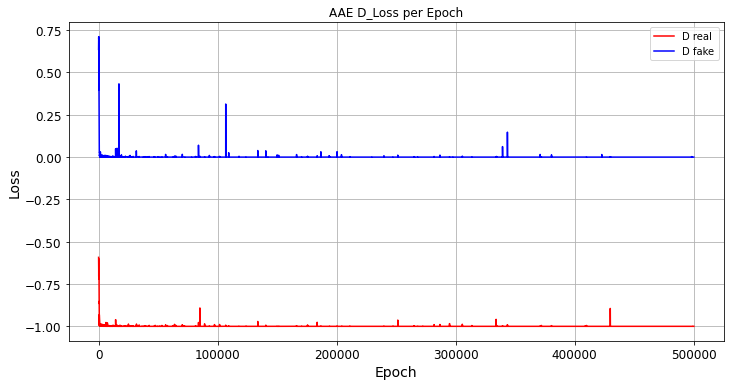

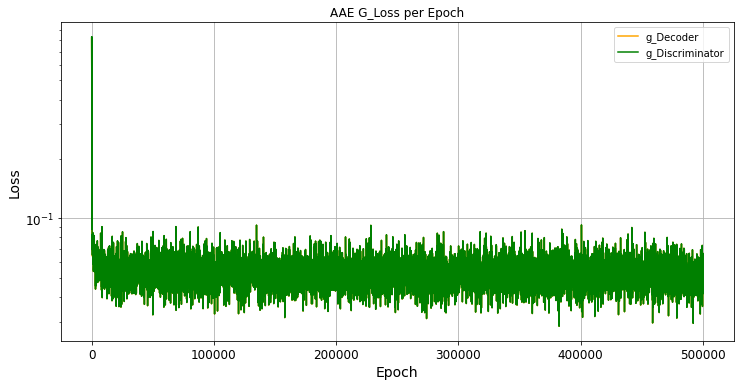

In [10]:
print('D_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.c1_hist, c='red')
ax.plot(aae.c2_hist, c='blue')

ax.legend(['D real', 'D fake'])
ax.grid()

plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE D_Loss per Epoch")
plt.savefig('AAE/Losses/AAE_dloss'+'.png')

print('G_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.g1_hist, c='orange')
ax.plot(aae.g2_hist, c='green')

ax.legend(['g_Decoder', 'g_Discriminator'])
ax.grid()

plt.tight_layout()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE G_Loss per Epoch")
plt.savefig('AAE/Losses/AAE_gloss'+'.png')


### predict from the decoder

In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

gm.predict([[0, 0], [12, 3]])


array([1, 0])

Predicted Values: (1000, 3)
X-Y 2D slices:


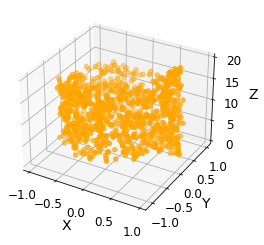

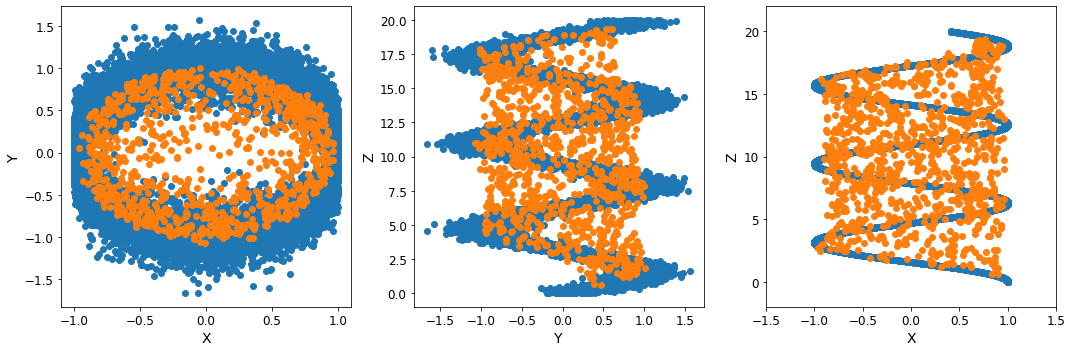

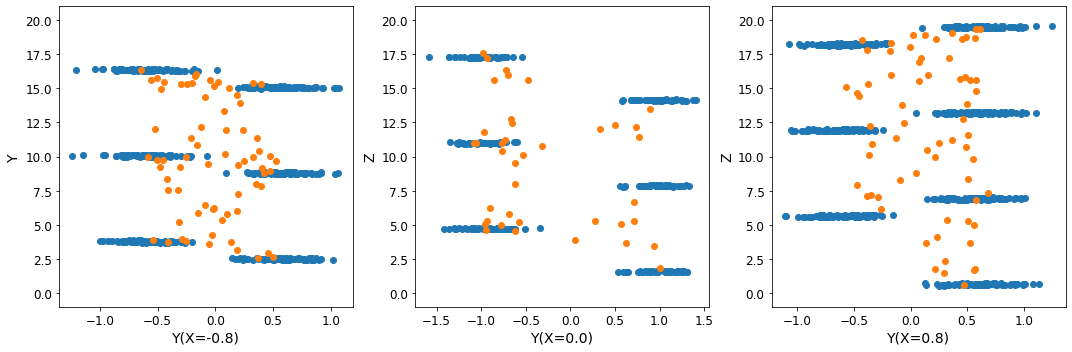

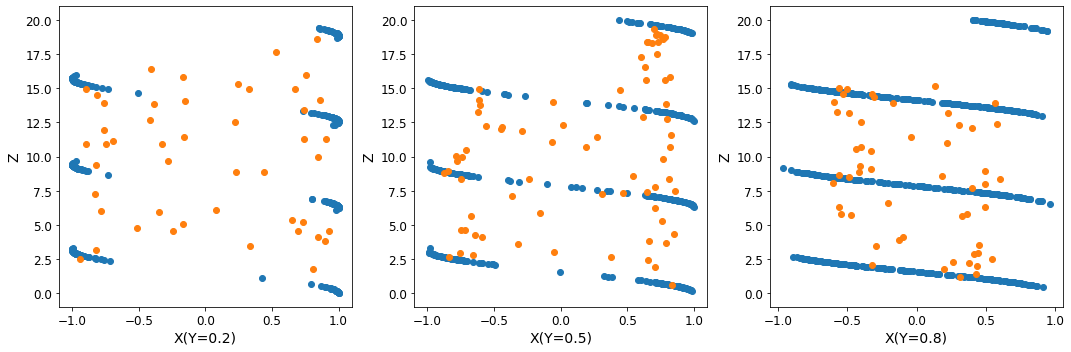

In [12]:
#predict the labels of the data values on the basis of the trained model.
#sampling from the latent space without prediction
#X, _ = make_swiss_roll(n_samples=int(self.batch_size*self.Z/3), noise=0.3)
#latent_values5 = X.reshape([1000,Z])
latent_values = tf.random.normal([1000, Z])
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
#predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2],c='orange')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    #ab = plt.subplot(projection='3d')
    #ab.scatter(latent_values5[:,0],latent_values5[:,1],latent_values5[:,2])
    #ab.set_ylabel('Y')
    #ab.set_zlabel('Z')
    #ab.set_xlabel('X')
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)

    axes[0].scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    axes[0].scatter(latent_values[:,0],latent_values[:,1],c='grey')
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X')

    
    
    axes[1].scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    #axes[1].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[1].set_ylabel('Y')
    axes[1].set_xlabel('X')

    
    axes[2].scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #axes[2].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[2].set_ylabel('Y')
    axes[2].set_xlabel('X')
    
    plt.tight_layout()




### Applying the prediction function

input_test : (900, 3)


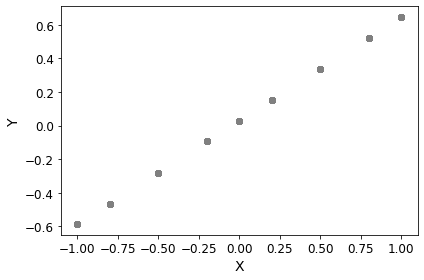

In [13]:
# define these for desired prediction
x_input = [-1.0,-0.8,-0.5,-0.2, 0, 0.2,0.5,0.8,1.0]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [14]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (900, 3)
input: (

X-Y 2D slices:


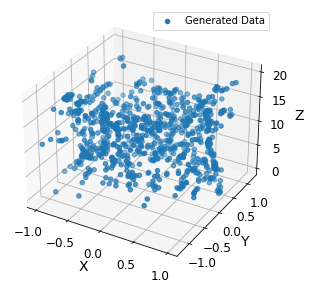

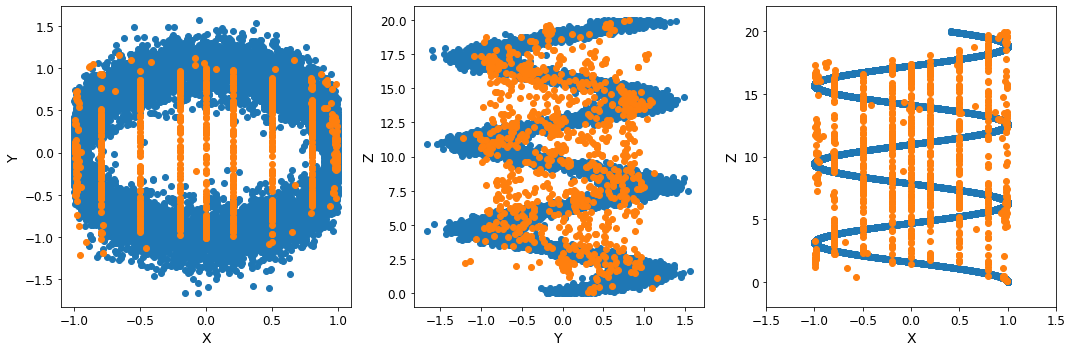

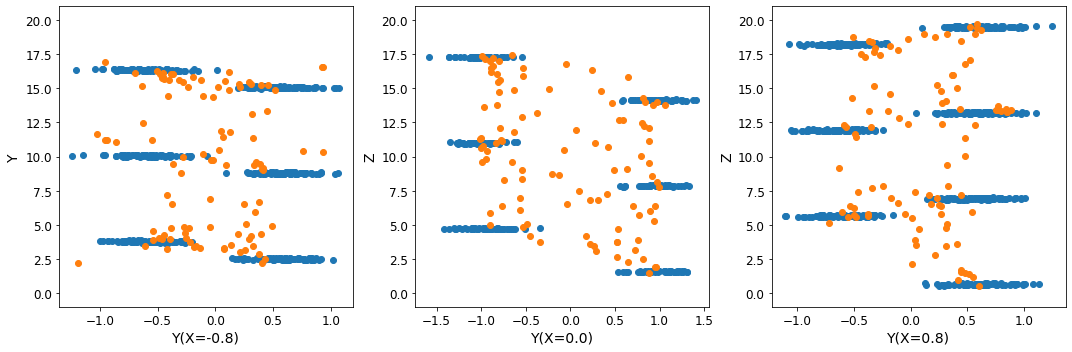

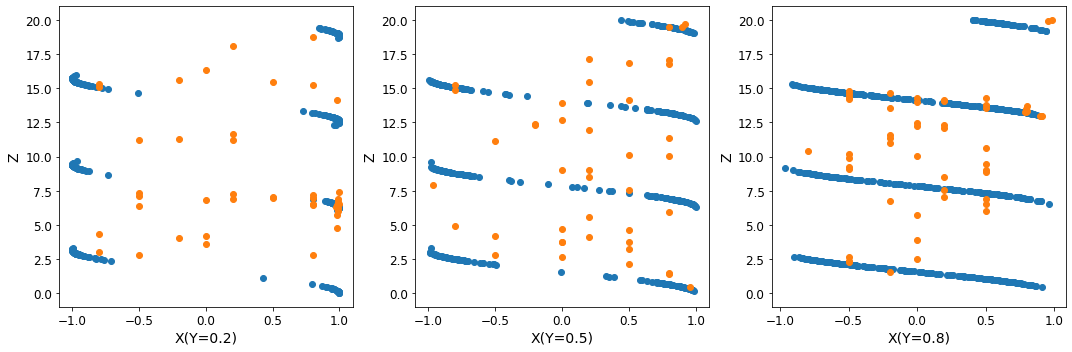

In [15]:
if scenario in ("3d", "helix"):

    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    